This is a sample notebook for running the YOLO object detection algorithm on images based on Darkflow implementation (https://github.com/thtrieu/darkflow). 

In [1]:
# Import needed libraries
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

In [2]:
# Set the model options
options = { 
    "model": "cfg/yolo.cfg",
    "load": "bin/yolov2.weights",
    "threshold": 0.3
}

# Instantiate the model
tfnet=TFNet(options)

C:\Users\lcolakovic\Documents\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.2880518436431885s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bno

In [3]:
# Read in an image (specify the path manually either from sample_img or data folders) and run labeling 
img = cv2.imread("sample_img/sample_person.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Image shape: ", img.shape)
result = tfnet.return_predict(img)
result

Image shape:  (424, 640, 3)


[{'label': 'person',
  'confidence': 0.8331292,
  'topleft': {'x': 187, 'y': 103},
  'bottomright': {'x': 271, 'y': 375}},
 {'label': 'dog',
  'confidence': 0.85083103,
  'topleft': {'x': 69, 'y': 259},
  'bottomright': {'x': 205, 'y': 354}},
 {'label': 'horse',
  'confidence': 0.8790005,
  'topleft': {'x': 397, 'y': 127},
  'bottomright': {'x': 606, 'y': 352}}]

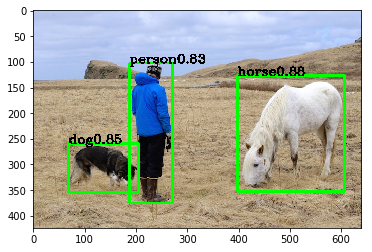

In [4]:
# Create bounding boxes around recognized objects and save the output image into result folder (specify the name of output image)
for r in result:
    tl = (r["topleft"]["x"],r["topleft"]["y"])
    br = (r["bottomright"]["x"],r["bottomright"]["y"])
    label = r["label"]
    conf = round(r["confidence"],2)
    
    im = cv2.rectangle(img, tl, br, (0, 255, 0), 3)
    im = cv2.putText(img, label+str(conf), tl, cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,0), 2)

plt.imsave('results/result.jpg', im)
plt.imshow(im)
plt.show()